In [1]:
import os
import json
import barcode
from barcode.writer import ImageWriter
from IPython.display import Image, display
from datetime import datetime

#CONFIGURATION

CATEGORY_PREFIX = "ELEC"       # Set category here (e.g., FOOD, CLOTH, TOOL)
OUTPUT_DIR = "barcodes"        # Folder for saved barcodes
TRACKER_FILE = "barcode_tracker.json"
BARCODE_TYPE = "code128"

#HELPER FUNCTIONS

def load_tracker():
    """Load existing barcode tracker."""
    if os.path.exists(TRACKER_FILE):
        with open(TRACKER_FILE, "r") as f:
            return json.load(f)
    return {}

def save_tracker(tracker):
    """Save tracker to file."""
    with open(TRACKER_FILE, "w") as f:
        json.dump(tracker, f, indent=4)

def generate_unique_code(prefix, tracker):
    """Generate a new, unique numeric code."""
    existing = tracker.get(prefix, 0)
    new_number = existing + 1
    tracker[prefix] = new_number
    return f"{prefix}{new_number:05d}"  # e.g. ELEC00001

def generate_barcode(product_name, prefix=CATEGORY_PREFIX):
    """Generate and save a barcode for a given product name."""
    tracker = load_tracker()
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    unique_code = generate_unique_code(prefix, tracker)
    code = barcode.get(BARCODE_TYPE, unique_code, writer=ImageWriter())
    
    safe_name = product_name.replace(" ", "_")
    filename = os.path.join(OUTPUT_DIR, f"{safe_name}_{unique_code}")
    full_path = code.save(filename)
    
    save_tracker(tracker)
    print(f" Generated barcode for {product_name}: {unique_code}")
    
    return unique_code, full_path


 Generated barcode for PPP: P00001


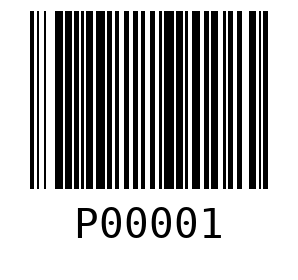

In [2]:
# REQUEST BARCODE

product_name = input("Enter the product name: ").strip()
category = input("Enter category code (e.g., ELEC, FOOD, TOY): ").strip().upper() or CATEGORY_PREFIX

if product_name:
    code, path = generate_barcode(product_name, prefix=category)
    display(Image(filename=path))
else:
    print("Product name cannot be empty.")
